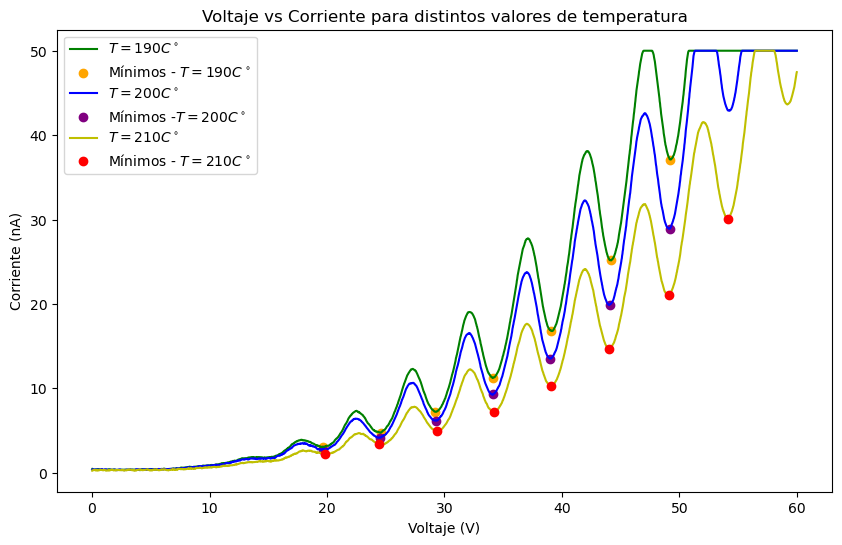

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
file_path1 =  "C:/Programación/Lab Intermedio/Franck Hertz/Datos 221.xlsx" 
file_path2 =  "C:/Programación/Lab Intermedio/Franck Hertz/Datos 222.xlsx" 
file_path3 =  "C:/Programación/Lab Intermedio/Franck Hertz/Datos 213.xlsx"
# Leer los archivos Excel
data1 = pd.read_excel(file_path1)
data2 = pd.read_excel(file_path2)
data3 = pd.read_excel(file_path3)
voltage1, current1 = data1['Voltage U1'], data1['Corriente IA']
voltage2, current2 = data2['Voltage U1'], data2['Corriente IA']
voltage3, current3 = data3['Voltage U1'], data3['Corriente IA']




Minimos1=[(19.7,2.75),(24.49, 4.16),(29.27, 6.17),(34.13, 9.28),(39.02, 13.52),(44.05, 19.9),(49.18, 28.91)]
Voltage_minimos1, Current_minimos1 = zip(*Minimos1) if Minimos1 else ([], [])
Minimos2=[(19.63, 3.04),(24.56, 4.74),(29.23, 7.21),(34.13, 11.24),(39.07, 16.84),(44.16, 25.15),(49.23, 37.11)]
Voltage_minimos2, Current_minimos2 = zip(*Minimos2) if Minimos2 else ([], [])
Minimos3=[(19.87, 2.21),(24.46, 3.41),(29.37, 4.94),(34.23, 7.24),(39.04, 10.33),(44.0, 14.72),(49.15, 21.02),(54.13, 30.12)]
Voltage_minimos3, Current_minimos3 = zip(*Minimos3) if Minimos3 else ([], [])
# Gráfico de Voltaje vs Corriente para ambos conjuntos de datos en el mismo plot
plt.figure(figsize=(10, 6))


plt.plot(voltage2, current2, label="$T=190C^\circ$", color="g")
plt.scatter(Voltage_minimos2, Current_minimos2,color= "orange", label="Mínimos - $T=190C^\circ$") 
plt.plot(voltage1, current1, label="$T=200C^\circ$", color="b")
plt.scatter(Voltage_minimos1, Current_minimos1, color="purple", label="Mínimos -$T=200C^\circ$") 
plt.plot(voltage3, current3, label="$T=210C^\circ$", color="y")
plt.plot(Voltage_minimos3, Current_minimos3, "ro", label="Mínimos - $T=210C^\circ$")

plt.title("Voltaje vs Corriente para distintos valores de temperatura")
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (nA)")
plt.legend()




plt.show()

# Conjunto de Datos 1

In [67]:
Minimos1

[(19.7, 2.75),
 (24.49, 4.16),
 (29.27, 6.17),
 (34.13, 9.28),
 (39.02, 13.52),
 (44.05, 19.9),
 (49.18, 28.91)]

In [68]:
Minimos2

[(19.63, 3.04),
 (24.56, 4.74),
 (29.23, 7.21),
 (34.13, 11.24),
 (39.07, 16.84),
 (44.16, 25.15),
 (49.23, 37.11)]

In [69]:
Minimos3

[(19.87, 2.21),
 (24.46, 3.41),
 (29.37, 4.94),
 (34.23, 7.24),
 (39.04, 10.33),
 (44.0, 14.72),
 (49.15, 21.02),
 (54.13, 30.12)]

In [70]:
D1y=np.array([4.79, 4,78,4.86,4.89, 5.03,5.13])
D1x=np.array([1,2,3,4,5, 6])

In [71]:
D2y=np.array([4.93, 4.67, 4.90, 4.94, 5.09, 5.07])
D2x=np.array([1,2,3,4,5, 6])

In [72]:
D3y=np.array([4.59, 4.91, 4.86, 4.81, 4.96, 5.15, 4.98])
D3x=np.array([1,2,3,4,5, 6,7])

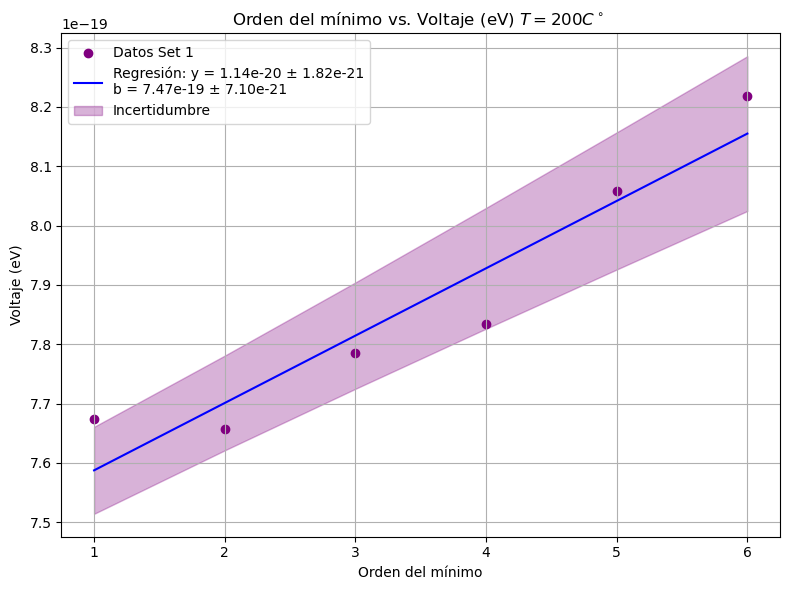

In [73]:
from scipy.optimize import curve_fit

# Función de modelo lineal
def linear_model(x, a, b):
    return a * x + b

# Datos del primer set
D1y = np.array([4.79, 4.78, 4.86, 4.89, 5.03, 5.13])
D1x = np.array([1, 2, 3, 4, 5, 6])

# Carga del electrón
e = 1.602e-19  # C

# Convertir el voltaje a electronvoltios (1 eV = 1.602e-19 C)
D1y = D1y * e

# Ajustar el modelo lineal a los datos
params1, covar1 = curve_fit(linear_model, D1x, D1y)

# Calcular las incertidumbres de los parámetros
errors1 = np.sqrt(np.diag(covar1))

# Generar los valores de la regresión
D1y_fit = linear_model(D1x, *params1)

# Calcular las incertidumbres en los valores ajustados
sigma_y1 = np.sqrt(np.diag(covar1)[0] * D1x**2 + np.diag(covar1)[1])  # Incertidumbre en los valores ajustados

# Calcular los residuales
residuals1 = D1y - D1y_fit

# Crear la figura con 2 subgráficas
fig, axs = plt.subplots( figsize=(8, 6))

# Primer gráfico: Datos y regresión con incertidumbre
axs.scatter(D1x, D1y, color='purple', label='Datos Set 1')
axs.plot(D1x, D1y_fit, color='blue', label=f'Regresión: y = {params1[0]:.2e} ± {errors1[0]:.2e}\nb = {params1[1]:.2e} ± {errors1[1]:.2e}')
axs.fill_between(D1x, D1y_fit - sigma_y1, D1y_fit + sigma_y1, color='purple', alpha=0.3, label='Incertidumbre')
#axs[0].text(1, 4.9e-19, f'a = {params1[0]:.2e} ± {errors1[0]:.2e}\nb = {params1[1]:.2e} ± {errors1[1]:.2e}', color='purple')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Voltaje (eV)')
axs.set_title('Orden del mínimo vs. Voltaje (eV) $T=200C^\circ$ ')
axs.legend()
axs.grid(True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()


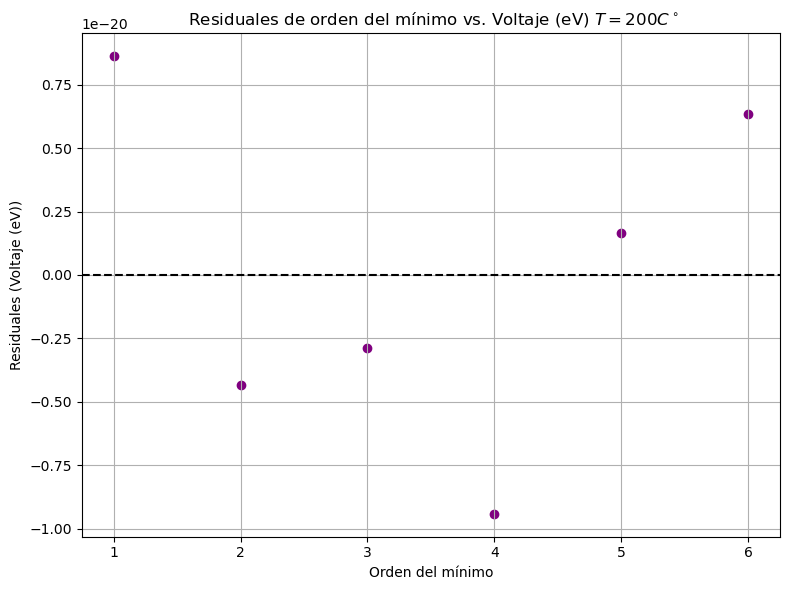

In [74]:
fig, axs = plt.subplots( figsize=(8, 6))

axs.scatter(D1x, residuals1, color='purple')
axs.axhline(0, color='black', linestyle='--')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Residuales (Voltaje (eV))')
axs.set_title(' Residuales de orden del mínimo vs. Voltaje (eV) $T=200C^\circ$')
axs.grid(True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()

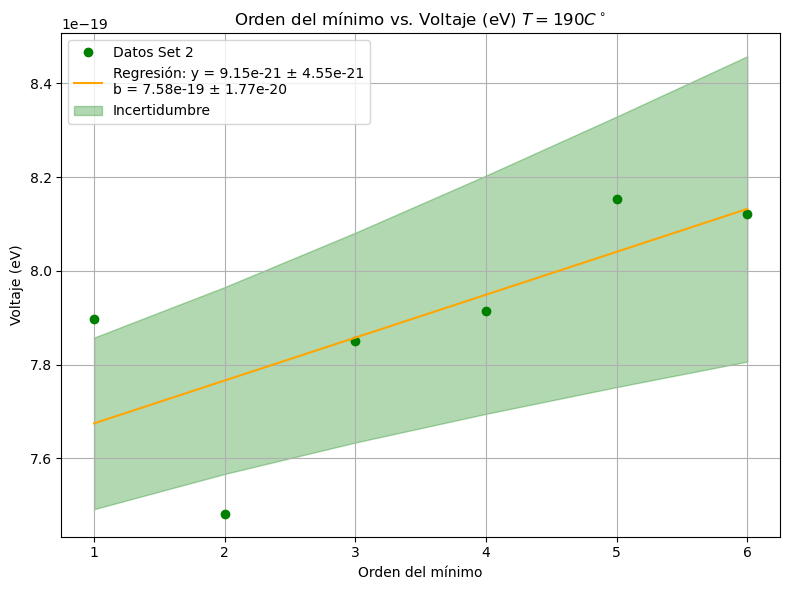

In [75]:
D2y = np.array([4.93, 4.67, 4.90, 4.94, 5.09, 5.07])
D2x = np.array([1, 2, 3, 4, 5, 6])

# Carga del electrón
e = 1.602e-19  # C

# Multiplicar los voltajes por la carga del electrón
D2y = D2y * e

# Ajustar el modelo lineal a los datos
params2, covar2 = curve_fit(linear_model, D2x, D2y)

# Calcular las incertidumbres de los parámetros
errors2 = np.sqrt(np.diag(covar2))

# Generar los valores de la regresión
D2y_fit = linear_model(D2x, *params2)

# Calcular las incertidumbres en los valores ajustados
sigma_y = np.sqrt(np.diag(covar2)[0] * D2x**2 + np.diag(covar2)[1])  # Incertidumbre en los valores ajustados

# Calcular los residuales
residuals2 = D2y - D2y_fit

# Crear la figura con 2 subgráficas
fig, axs = plt.subplots(figsize=(8, 6))

# Primer gráfico: Datos y regresión con incertidumbre
axs.plot(D2x, D2y, 'go', label='Datos Set 2')
axs.plot(D2x, D2y_fit, color='orange', label=f'Regresión: y = {params2[0]:.2e} ± {errors2[0]:.2e}\nb = {params2[1]:.2e} ± {errors2[1]:.2e}')
axs.fill_between(D2x, D2y_fit - sigma_y, D2y_fit + sigma_y, color='g', alpha=0.3, label='Incertidumbre')
#axs[0].text(1, 4.9e-19, f'a = {params2[0]:.2e} ± {errors2[0]:.2e}\nb = {params2[1]:.2e} ± {errors2[1]:.2e}', color='g')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Voltaje (eV)')
axs.set_title('Orden del mínimo vs. Voltaje (eV) $T=190C^\circ$')
axs.legend(loc='upper left')
axs.grid(True)

# Segundo gráfico: Residuales

# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

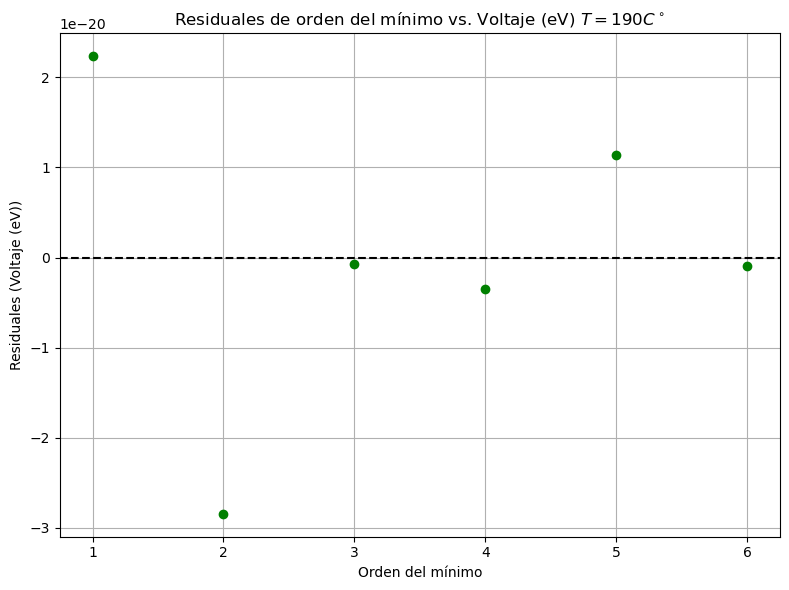

In [76]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(D2x, residuals2, 'go')
axs.axhline(0, color='black', linestyle='--')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Residuales (Voltaje (eV))')
axs.set_title('Residuales de orden del mínimo vs. Voltaje (eV) $T=190C^\circ$')
axs.grid(True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()

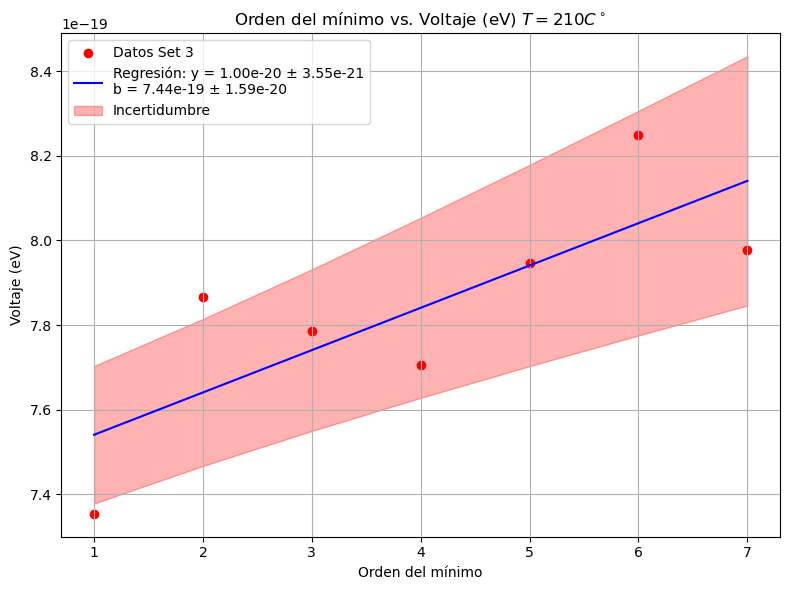

In [77]:
D3y = np.array([4.59, 4.91, 4.86, 4.81, 4.96, 5.15, 4.98])
D3x = np.array([1, 2, 3, 4, 5, 6, 7])

# Carga del electrón
e = 1.602e-19  # C

# Convertir el voltaje a electronvoltios (1 eV = 1.602e-19 C)
D3y = D3y * e

# Ajustar el modelo lineal a los datos
params3, covar3 = curve_fit(linear_model, D3x, D3y)

# Calcular las incertidumbres de los parámetros
errors3 = np.sqrt(np.diag(covar3))

# Generar los valores de la regresión
D3y_fit = linear_model(D3x, *params3)

# Calcular las incertidumbres en los valores ajustados
sigma_y3 = np.sqrt(np.diag(covar3)[0] * D3x**2 + np.diag(covar3)[1])  # Incertidumbre en los valores ajustados

# Calcular los residuales
residuals3 = D3y - D3y_fit

# Crear la figura con 2 subgráficas
fig, axs = plt.subplots(figsize=(8, 6))

# Primer gráfico: Datos y regresión con incertidumbre
axs.scatter(D3x, D3y, color='r', label='Datos Set 3')
axs.plot(D3x, D3y_fit, 'b-', label=f'Regresión: y = {params3[0]:.2e} ± {errors3[0]:.2e}\nb = {params3[1]:.2e} ± {errors3[1]:.2e}')
axs.fill_between(D3x, D3y_fit - sigma_y3, D3y_fit + sigma_y3, color='r', alpha=0.3, label='Incertidumbre')
#axs[0].text(1, 4.9e-19, f'a = {params3[0]:.2e} ± {errors3[0]:.2e}\nb = {params3[1]:.2e} ± {errors3[1]:.2e}', color='b')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Voltaje (eV)')
axs.set_title('Orden del mínimo vs. Voltaje (eV) $T=210C^\circ$')
axs.legend(loc='upper left')
axs.grid(True)



# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

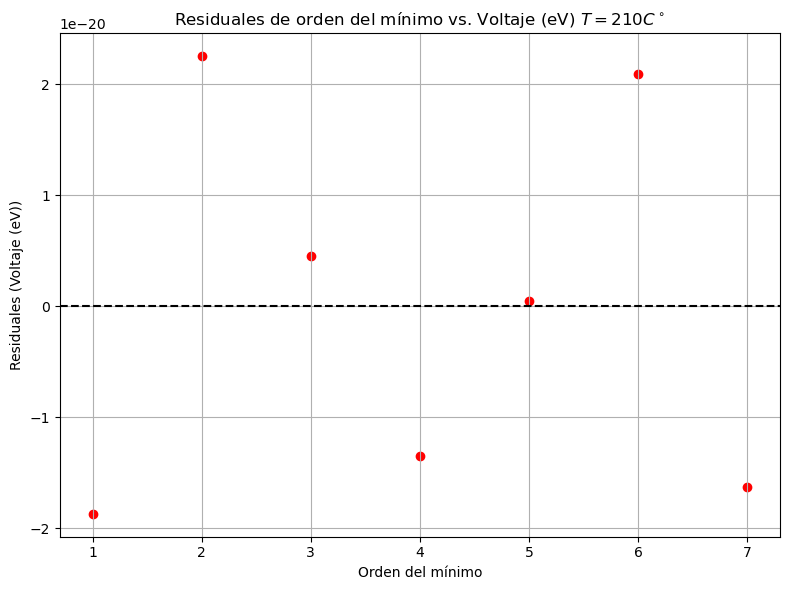

In [78]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.scatter(D3x, residuals3, color='r')
axs.axhline(0, color='black', linestyle='--')
axs.set_xlabel('Orden del mínimo')
axs.set_ylabel('Residuales (Voltaje (eV))')
axs.set_title('Residuales de orden del mínimo vs. Voltaje (eV) $T=210C^\circ$')
axs.grid(True)

# Ajustar el espacio entre subgráficas
plt.tight_layout()

# Mostrar los gráficos
plt.show()